# DAP APPLICATION 
## BATCH : 17
2111CS010114- G DEEPAK

2111CS010119- BODA DAKSHITHA REDDY

2111CS010141- N GANESH

2111CS010155- D GOVARDHAN

2111CS010166- M HARISH 


ABSTRACT :
          This data analytics project focuses on analyzing the CO2 emissions of petrol and diesel-based cars. The dataset comprises emissions data collected from various models of conventional combustion engine vehicles. Through thorough data exploration, statistical analysis, and visualization techniques, the project aims to uncover patterns and trends in CO2 emissions, considering factors such as engine size, fuel efficiency, vehicle weight, and emission control systems. By understanding the determinants of CO2 emissions in traditional internal combustion engine vehicles,
          <font color="red">this study seeks to provide insights for policymakers, automotive manufacturers, and consumers aiming to mitigate environmental impact and promote more sustainable transportation practices.</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


##  1. Load dataset & getting an overview

In [2]:
# Load Cars Dataset
df = pd.read_csv("CO2_Emissions.csv")
df

,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb.1,CO2_Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
# Get Size of Dataset (Rows and Columns)
df.shape

(7385, 12)

In [4]:
# Get Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     7385 non-null   object 
 1   Model                    7385 non-null   object 
 2   Vehicle_Class            7385 non-null   object 
 3   Engine_Size              7385 non-null   float64
 4   Cylinders                7385 non-null   int64  
 5   Transmission             7385 non-null   object 
 6   Fuel_Type                7385 non-null   object 
 7   Fuel_Consumption_City    7385 non-null   float64
 8   Fuel_Consumption_Hwy     7385 non-null   float64
 9   Fuel_Consumption_Comb    7385 non-null   float64
 10  Fuel_Consumption_Comb.1  7385 non-null   int64  
 11  CO2_Emissions            7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


In [5]:
# Print Column Names Only
df.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City ',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb',
       'Fuel_Consumption_Comb.1', 'CO2_Emissions'],
      dtype='object')

Here's a one-line description for each column in your dataset:

1. Make: The manufacturer or brand of the vehicle.
2. Model: The specific model name or designation of the vehicle.
3. Vehicle Class: The categorization of the vehicle based on its size, type, and purpose (e.g., sedan, SUV, truck).
4. Engine Size(L): The displacement volume of the vehicle's engine in liters.
5. Cylinders: The number of cylinders in the vehicle's engine.
6. Transmission: The type of transmission system used in the vehicle (e.g., automatic, manual).
7. Fuel Type: The type of fuel used by the vehicle (e.g., gasoline, diesel, petrol).
8. Fuel Consumption City (L/100 km): The fuel consumption rate in liters per 100 kilometers while driving in urban/city conditions.
9. Fuel Consumption Hwy (L/100 km): The fuel consumption rate in liters per 100 kilometers while driving on the highway.
10. Fuel Consumption Comb (L/100 km): The combined fuel consumption rate in liters per 100 kilometers, considering both city and highway driving.
11. Fuel Consumption Comb (mpg): The combined fuel consumption rate in miles per gallon (mpg), considering both city and highway driving.
12. CO2 Emissions(g/km): The amount of CO2 emissions produced by the vehicle per kilometer traveled, measured in grams per kilometer.

In [6]:
# To find the total no.of rows which are missing value in a column
df.isnull().sum()

Make                       0
Model                      0
Vehicle_Class              0
Engine_Size                0
Cylinders                  0
Transmission               0
Fuel_Type                  0
Fuel_Consumption_City      0
Fuel_Consumption_Hwy       0
Fuel_Consumption_Comb      0
Fuel_Consumption_Comb.1    0
CO2_Emissions              0
dtype: int64

In [7]:
df = df.rename(columns={'Fuel_Consumption_Comb.1': 'Fuel_Consumption_Comb_mpg'})
df.head()

,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
# Summary statistics
# if std is 0, that column should be removed from analysis
df.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


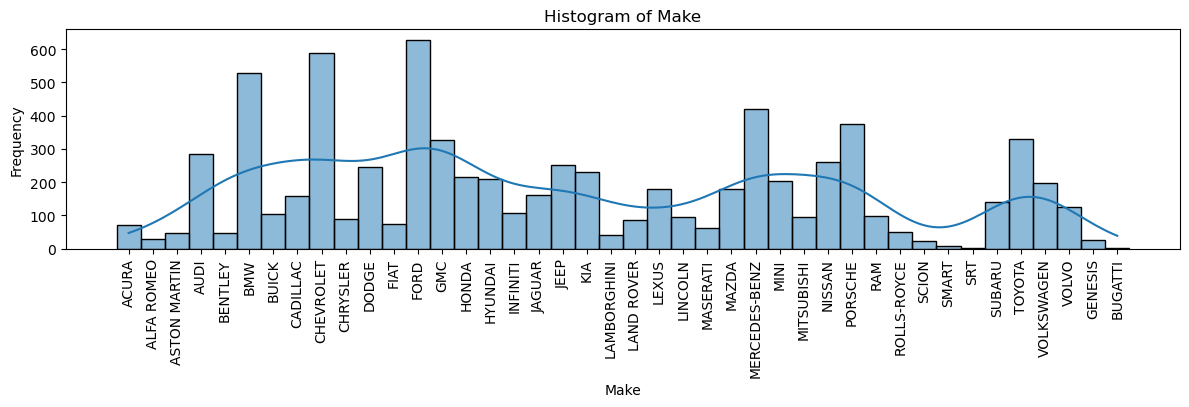

C:\Users\91994\AppData\Local\Temp\ipykernel_16584\1768532807.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


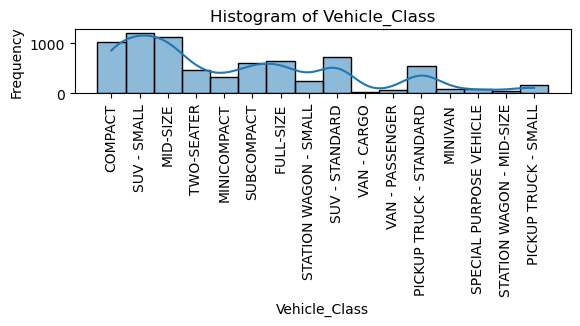

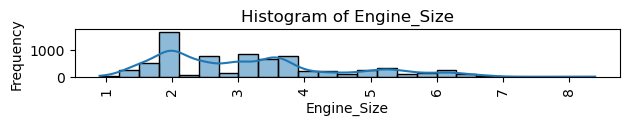

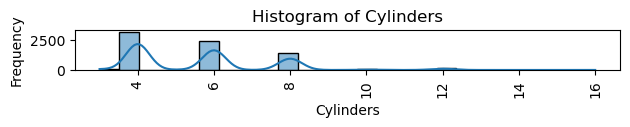

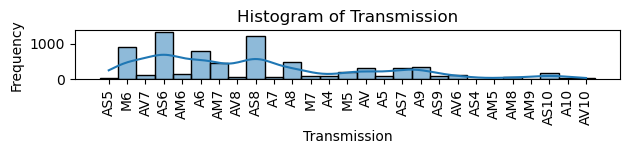

In [9]:
# Select only numeric type of columns by their names as:
df1 = df[['Make','Vehicle_Class','Engine_Size','Cylinders','Transmission']]
df1
# Create subplots for the histograms
plt.figure(figsize=(12, 18))
for i, var in enumerate(df1, 1):
    plt.subplot(5, 1, i)
    sns.histplot(df[var], bins=25, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

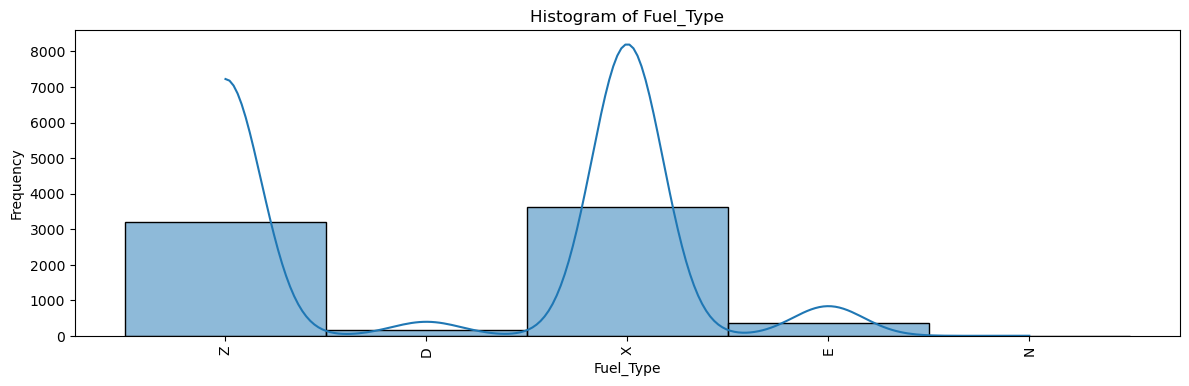

In [10]:
# Select only numeric type of columns by their names as:
df1 = df[['Fuel_Type']]
df1
# Create subplots for the histograms
plt.figure(figsize=(12, 18))
for i, var in enumerate(df1, 1):
    plt.subplot(5, 1, i)
    sns.histplot(df[var], bins=25, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

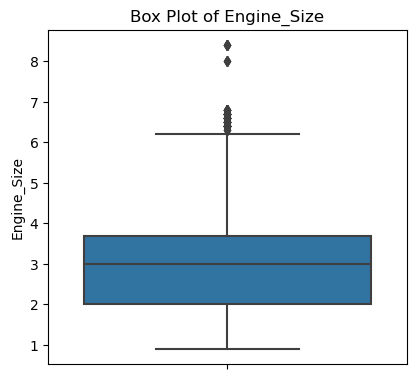

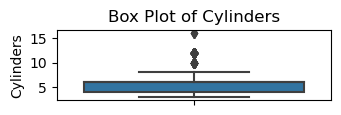

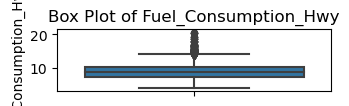

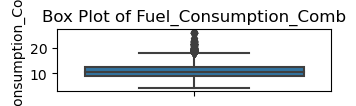

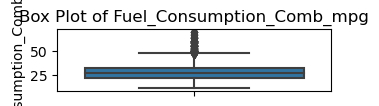

In [11]:
# Select only numeric type of columns by their names as:
df1 = df[['Engine_Size','Cylinders','Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb','Fuel_Consumption_Comb_mpg']]
df1
# Create subplots for the histograms
plt.figure(figsize=(8, 18))
for i, var in enumerate(df1, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(y=var, data=df)
    plt.title(f'Box Plot of {var}')
    plt.tight_layout()
    plt.show()



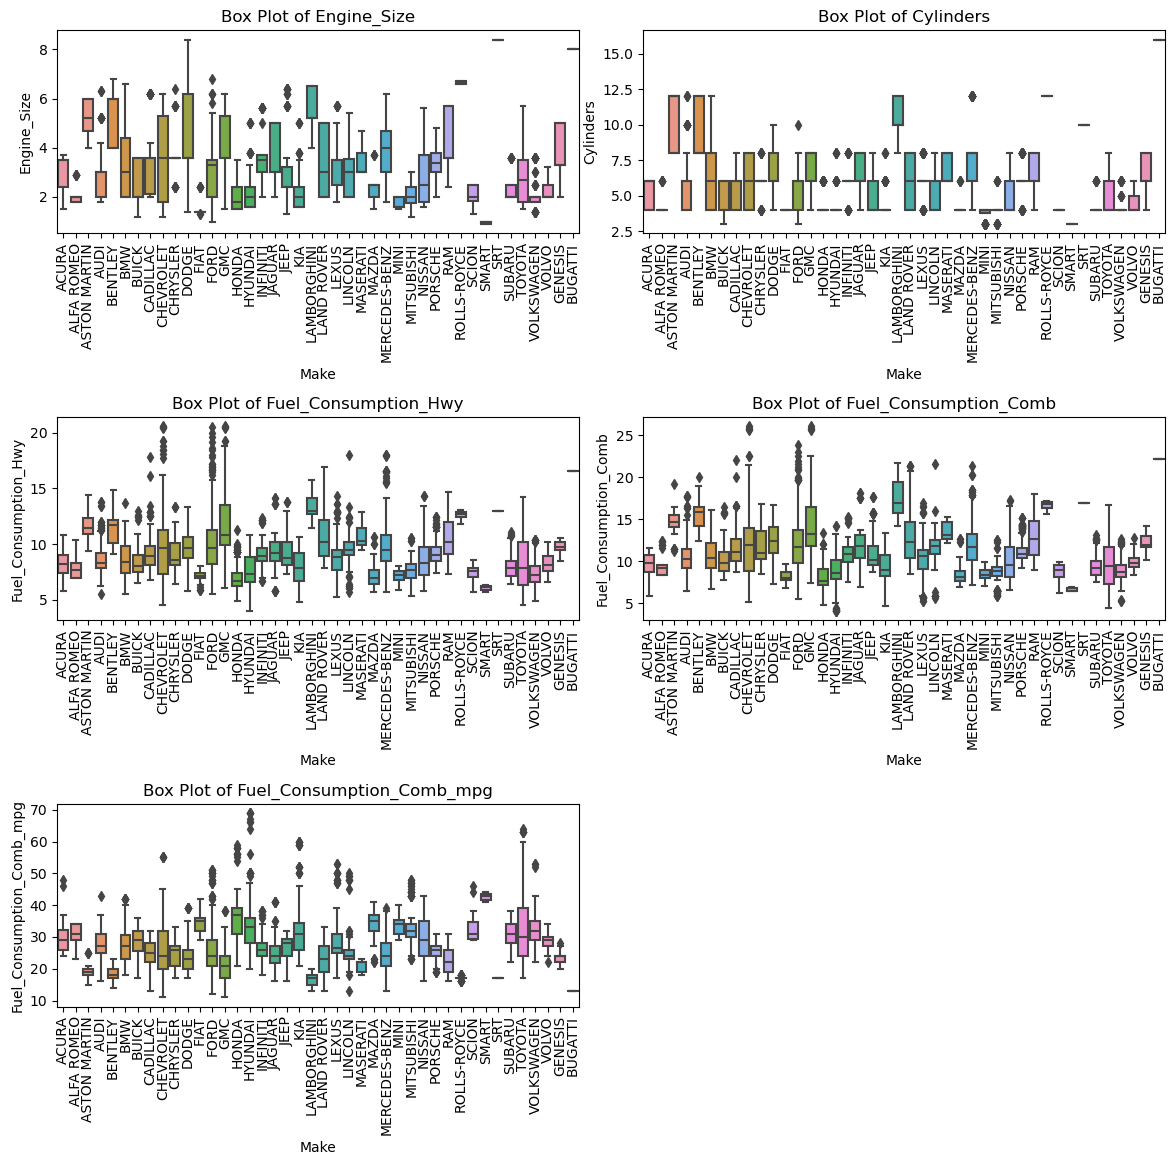

In [12]:

# Select only numeric type of columns by their names as:
df1 = df[['Engine_Size','Cylinders','Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb','Fuel_Consumption_Comb_mpg']]
df1
# Create subplots for the histograms
plt.figure(figsize=(12, 18))
for i, var in enumerate(df1, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='Make', y=var, data=df)
    plt.title(f'Box Plot of {var}')
    plt.xticks(rotation=90)
    plt.xlabel('Make')
    plt.ylabel(var)
plt.tight_layout()
plt.show()


In [13]:
# Calculate Z-scores for CO2_Emissions
z_scores = np.abs((df.CO2_Emissions - np.mean(df.CO2_Emissions)) / np.std(df.CO2_Emissions))

# Set a threshold for identifying outliers (e.g., Z-score > 3)
outliers = df[z_scores > 3]

outliers[['Make','CO2_Emissions']]

,Make,CO2_Emissions
75,BENTLEY,437
224,CHEVROLET,432
227,CHEVROLET,435
349,FORD,488
448,GMC,432
451,GMC,435
1323,CHEVROLET,432
1324,CHEVROLET,432
1327,CHEVROLET,437
1328,CHEVROLET,437


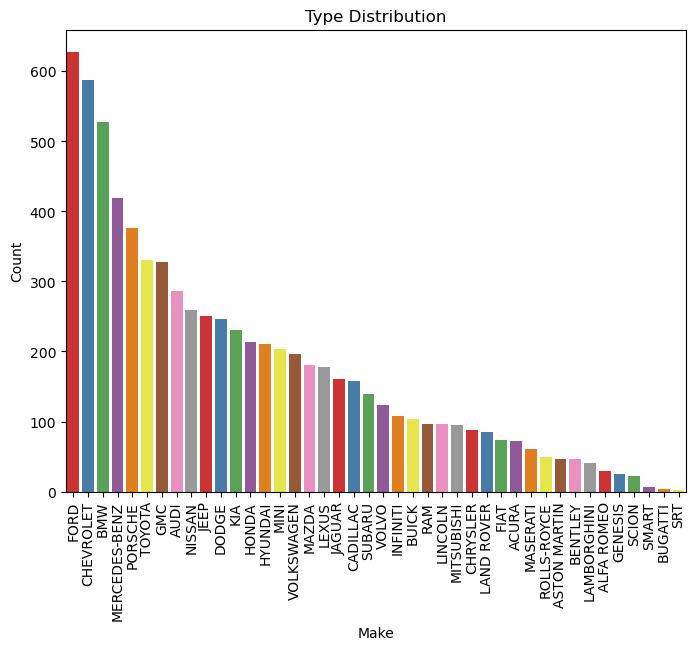

In [14]:
# Countplot of a categorical variable
plt.figure(figsize=(8, 6))
# Get the count of each category and sort them in ascending order
order = df['Make'].value_counts().index
sns.countplot(x=df['Make'], palette="Set1", order=order)
plt.title('Type Distribution')
plt.xlabel('Make')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

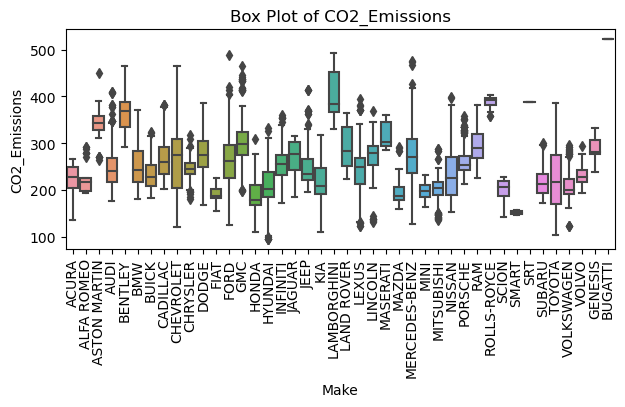

In [15]:
# Select only numeric type of columns by their names as:
df1 = df[['CO2_Emissions']]
df1
# Create subplots for the histograms
plt.figure(figsize=(12, 18))
for i, var in enumerate(df1, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='Make', y=var, data=df)
    plt.title(f'Box Plot of {var}')
    plt.xticks(rotation=90)
    plt.xlabel('Make')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

In [16]:
# Assuming 'column_name' is the column containing the data with outliers
column_name = 'CO2_Emissions'
# Calculate z-scores for the column
z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
# Define a threshold (e.g., 3 standard deviations)
threshold = 3
# Identify outliers
outliers = df[abs(z_scores) > threshold]
# Handle outliers (e.g., replace with the mean value)
mean_value = df[column_name].mean()
df.loc[abs(z_scores) > threshold, column_name] = mean_value

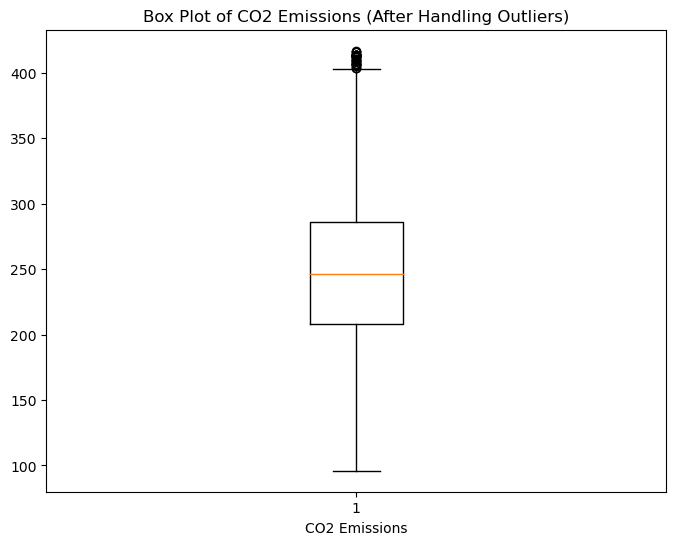

In [17]:
# Assuming 'column_name' is the column containing the data with outliers
column_name = 'CO2_Emissions'
# Calculate z-scores for the column
z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
# Define a threshold (e.g., 3 standard deviations)
threshold = 3
# Replace outliers with the mean value
mean_value = df[column_name].mean()
df.loc[abs(z_scores) > threshold, column_name] = mean_value
# Create a box plot for 'CO2_Emissions' after handling outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name])
plt.title('Box Plot of CO2 Emissions (After Handling Outliers)')
plt.xlabel('CO2 Emissions')
plt.ylabel('')
plt.show()


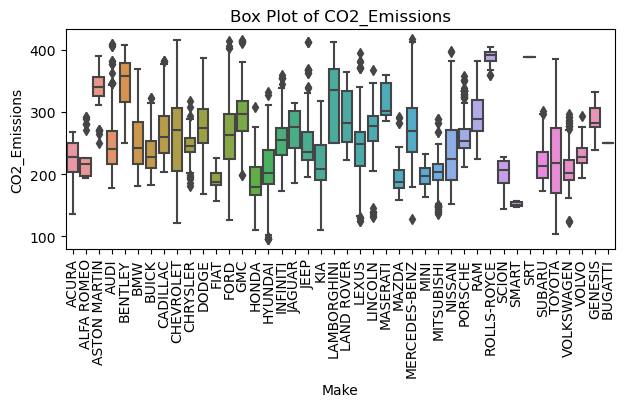

In [18]:
# Select only numeric type of columns by their names as:
df1 = df[['CO2_Emissions']]
df1
# Create subplots for the histograms
plt.figure(figsize=(12, 18))
for i, var in enumerate(df1, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='Make', y=var, data=df)
    plt.title(f'Box Plot of {var}')
    plt.xticks(rotation=90)
    plt.xlabel('Make')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

## COUNT PLOT ON ALL CATEGORICAL VALUES

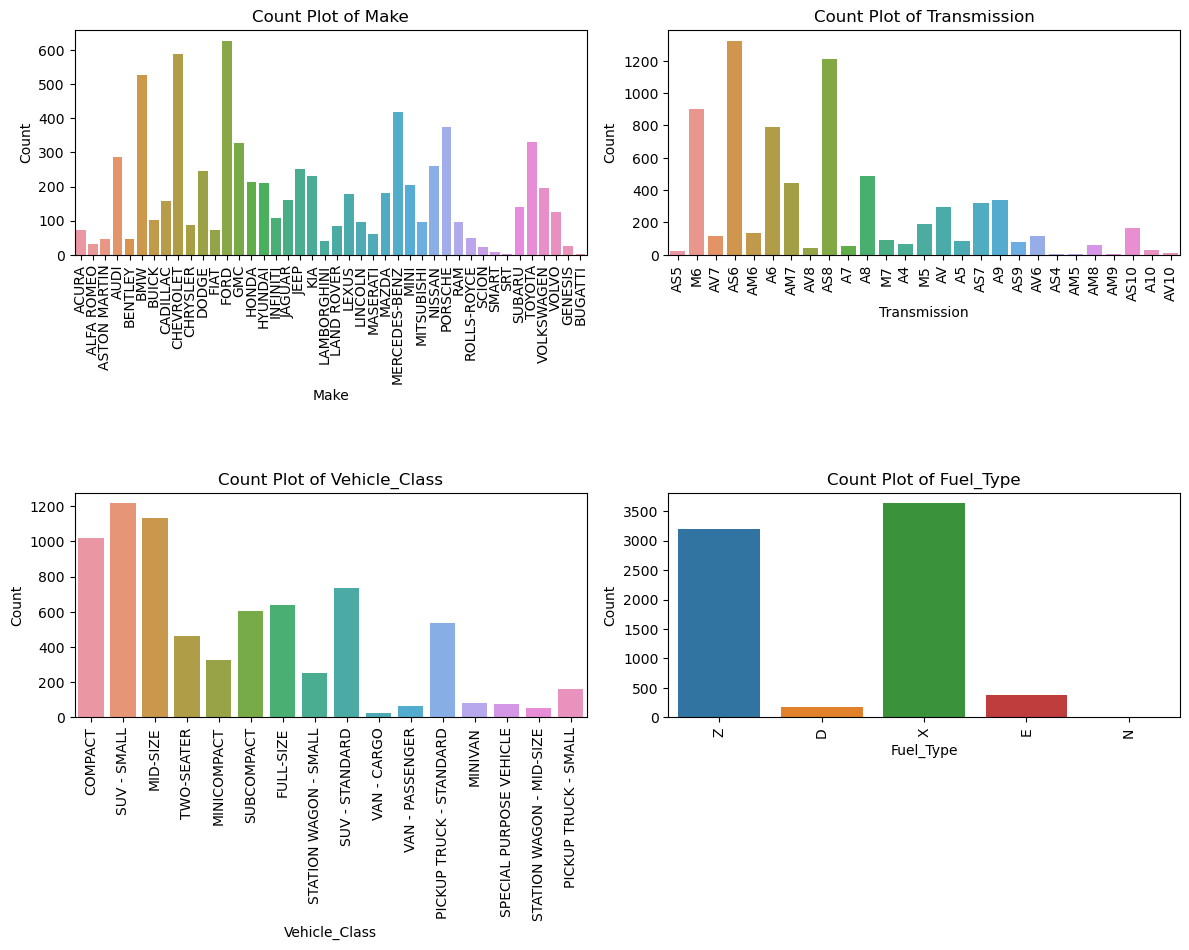

In [21]:
# Select only categorical variables for the count plot
categorical_vars = ['Make','Transmission','Vehicle_Class','Fuel_Type']
# Create subplots for the count plots
plt.figure(figsize=(12, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=var)
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


## CORRELATION ANALYSIS

In [22]:
# find correlations between all columns
df.corr(method='pearson')

C:\Users\91994\AppData\Local\Temp\ipykernel_16584\3463734077.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions
Engine_Size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.828787
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.804955
Fuel_Consumption_City,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.879159
Fuel_Consumption_Hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.848379
Fuel_Consumption_Comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.879059
Fuel_Consumption_Comb_mpg,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.901921
CO2_Emissions,0.828787,0.804955,0.879159,0.848379,0.879059,-0.901921,1.000000


C:\Users\91994\AppData\Local\Temp\ipykernel_16584\588602681.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


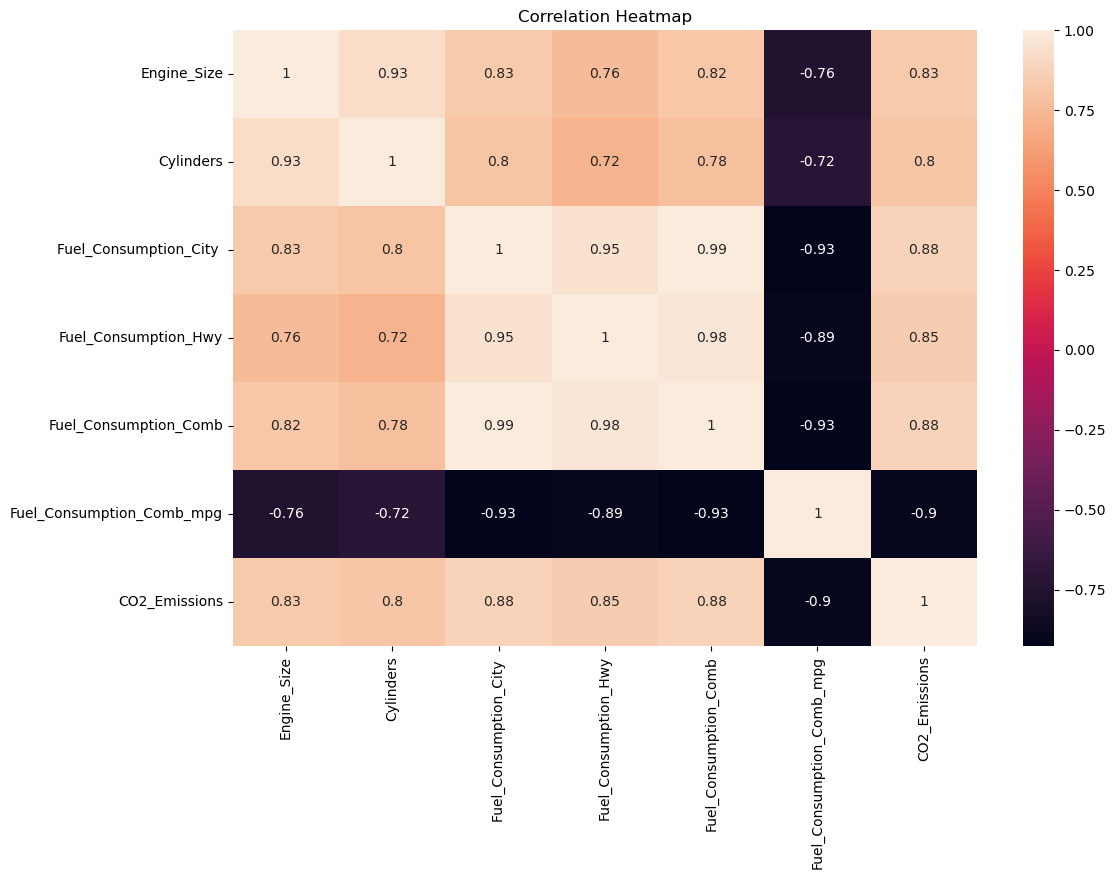

In [24]:
# Calculate correlation matrix
correlation_matrix = df.corr()
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# Sort correlations for 'MSRP' column in descending order
sorted_corr_msrp = correlation_matrix['CO2_Emissions'].sort_values(ascending=False)
sorted_corr_msrp


CO2_Emissions                1.000000
Fuel_Consumption_City        0.879159
Fuel_Consumption_Comb        0.879059
Fuel_Consumption_Hwy         0.848379
Engine_Size                  0.828787
Cylinders                    0.804955
Fuel_Consumption_Comb_mpg   -0.901921
Name: CO2_Emissions, dtype: float64

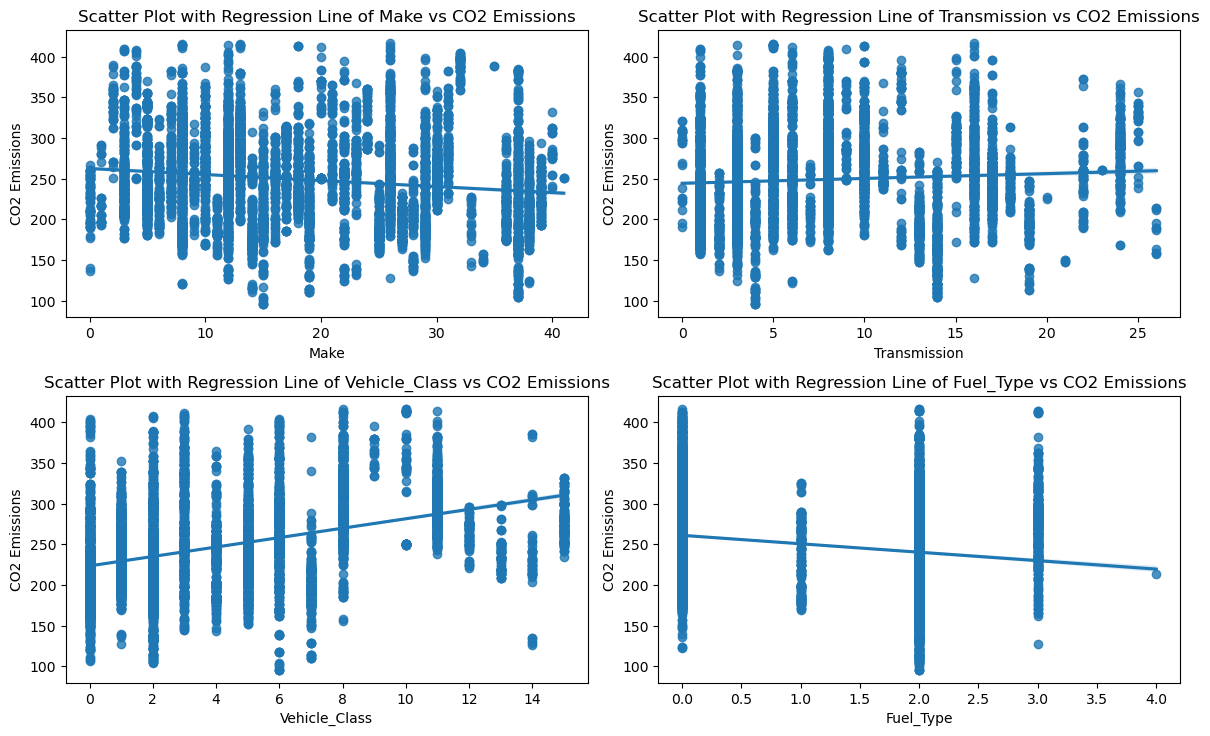

In [27]:
# Assuming 'column_name' is the column containing the data with outliers
column_name = 'CO2_Emissions'
# Create subplots for the count plots
plt.figure(figsize=(12, 18))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(5, 2, i)
    # Encode categorical variable to numerical values
    df_encoded = df.copy()
    df_encoded[var] = pd.factorize(df_encoded[var])[0]
    # Plot scatter plot with regression line
    sns.regplot(x=var, y='CO2_Emissions', data=df_encoded)
    plt.title(f'Scatter Plot with Regression Line of {var} vs CO2 Emissions')
    plt.xlabel(var)
    plt.ylabel('CO2 Emissions')
plt.tight_layout()
plt.show()


 LETS TAKE RANDOM FOREST ALGORITHM
 
 Absolutely! Here's a simplified version for your documentation:

"I chose the Random Forest algorithm for my predictive modeling project because it can handle both numerical and categorical data easily. With features like 'Make', 'Model', and 'Fuel Type' in my dataset, having an algorithm that can handle mixed data types is crucial. Additionally, Random Forests are robust to overfitting and provide insights into feature importance, making them suitable for predicting CO2 emissions accurately. Their simplicity in implementation and tuning also makes them a practical choice for my project."

6. APPLY MACHINE LEARNING ALGORITHM


In [32]:
# Select only numeric type of columns by their names as:
x = df[['Fuel_Consumption_Comb','Fuel_Consumption_Hwy','Engine_Size','Cylinders']]
x

,Fuel_Consumption_Comb,Fuel_Consumption_Hwy,Engine_Size,Cylinders
0,8.5,6.7,2.0,4
1,9.6,7.7,2.4,4
2,5.9,5.8,1.5,4
3,11.1,9.1,3.5,6
4,10.6,8.7,3.5,6
...,...,...,...,...
7380,9.4,7.7,2.0,4
7381,9.9,8.3,2.0,4
7382,10.3,8.6,2.0,4
7383,9.9,8.3,2.0,4


In [33]:
# Select only numeric type of columns by their names as:
y = df[['CO2_Emissions']]
y

,CO2_Emissions
0,196.0
1,221.0
2,136.0
3,255.0
4,244.0
...,...
7380,219.0
7381,232.0
7382,240.0
7383,232.0


In [35]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (5908, 4)
X_test: (1477, 4)


In [37]:
from sklearn.preprocessing import StandardScaler
# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [42]:
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor instead of RandomForestClassifier

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to convert y_train to a 1D array


RandomForestRegressor(random_state=42)

In [43]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [44]:
#LETS MAE SOME PREDICTIONS ON THE DATA
# # Make predictions on the New data
Fuel_Consumption_Comb=10.1
Fuel_Consumption_Hwy=8.1
Engine_Size=3.5
Cylinders=1
y_pred = model.predict([[Fuel_Consumption_Comb,Fuel_Consumption_Hwy,Engine_Size,Cylinders]])
print(f"Predicted Value: {round(y_pred[0])}")


Predicted Value: 270
